<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#imports" data-toc-modified-id="imports-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>imports</a></span></li><li><span><a href="#load-data" data-toc-modified-id="load-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>load data</a></span><ul class="toc-item"><li><span><a href="#read-in-the-files" data-toc-modified-id="read-in-the-files-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>read in the files</a></span><ul class="toc-item"><li><span><a href="#data-from-linear-and-relu-activations" data-toc-modified-id="data-from-linear-and-relu-activations-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>data from linear and relu activations</a></span></li></ul></li><li><span><a href="#create-pandas-table" data-toc-modified-id="create-pandas-table-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>create pandas table</a></span></li></ul></li><li><span><a href="#filter-out-bad-training-losses" data-toc-modified-id="filter-out-bad-training-losses-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>filter out bad training losses</a></span></li><li><span><a href="#determine-the-lambda-parameter-that-gets-the-best-validation-MSE-for-each-(r,n,L)" data-toc-modified-id="determine-the-lambda-parameter-that-gets-the-best-test-MSE-for-each-(r,n,L)-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>determine the lambda parameter that gets the best test MSE for each (r,n,L)</a></span></li><li><span><a href="#Generalization-MSE" data-toc-modified-id="Generalization-MSE-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Generalization MSE</a></span><ul class="toc-item"><li><span><a href="#generate-data" data-toc-modified-id="generate-data-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>generate data</a></span></li><li><span><a href="#compute-MSE" data-toc-modified-id="compute-MSE-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>compute MSE</a></span></li></ul></li><li><span><a href="#Out-of-Distribution-MSE" data-toc-modified-id="Out-of-Distribution-MSE-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Out of Distribution MSE</a></span><ul class="toc-item"><li><span><a href="#generate-data" data-toc-modified-id="generate-data-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>generate data</a></span></li><li><span><a href="#compute-MSE" data-toc-modified-id="compute-MSE-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>compute MSE</a></span></li></ul></li><li><span><a href="#Active-Subspace" data-toc-modified-id="Active-Subspace-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Active Subspace</a></span><ul class="toc-item"><li><span><a href="#evaluate-gradients-and-compute-singular-values-and-active-subspaces" data-toc-modified-id="evaluate-gradients-and-compute-singular-values-and-active-subspaces-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>evaluate gradients and compute singular values and active subspaces</a></span></li><li><span><a href="#plot-of-singular-values" data-toc-modified-id="plot-of-singular-values-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>plot of singular values</a></span></li></ul></li><li><span><a href="#determine-the-L-parameter-that-gets-the-best-test-MSE-for-each-(r,n)" data-toc-modified-id="determine-the-L-parameter-that-gets-the-best-test-MSE-for-each-(r,n)-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>determine the L parameter that gets the best test MSE for each (r,n)</a></span></li><li><span><a href="#Plots-of-L-vs-Test-error-and-n-vs-Generalization-metrics-with/without-linear-layers" data-toc-modified-id="Plots-of-L-vs-Validation-error-and-n-vs-Generalization-metrics-with/without-linear-layers-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Plots of L vs Test error and n vs Generalization metrics with/without linear layers</a></span></li><li><span><a href="#Final-Table" data-toc-modified-id="Final-Table-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Final Table</a></span></li><li><span><a href="#Training-Time-Plots" data-toc-modified-id="Training-Time-Plots-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>Training Time Plots</a></span><ul class="toc-item"><li><span><a href="#Train-MSE-v-Epoch" data-toc-modified-id="Train-MSE-v-Epoch-11.1"><span class="toc-item-num">11.1&nbsp;&nbsp;</span>Train MSE v Epoch</a></span></li><li><span><a href="#Weight-Decay-v-Epoch" data-toc-modified-id="Weight-Decay-v-Epoch-11.2"><span class="toc-item-num">11.2&nbsp;&nbsp;</span>Weight Decay v Epoch</a></span></li><li><span><a href="#learning-rates" data-toc-modified-id="learning-rates-11.3"><span class="toc-item-num">11.3&nbsp;&nbsp;</span>learning rates</a></span></li></ul></li></ul></div>

# imports

In [19]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from torch import nn
import torch
from matplotlib.lines import Line2D
from scipy.stats import sem

# load data and create pandas table

In [20]:
job_name = "deeprelu"
res = pd.read_pickle(job_name+"_results")

In [21]:
res

,r,sigma,n,L,lambda,Test MSE,Train MSE,Weight Decay,Learning Rate,Activations,...,Out-of-Distribution Squared Errors,Out-of-Distribution MSE,Out-of-Distribution SEM,Out-of-Distribution STD of Squared Errors,Out-of-Distribution MSE$/\sigma^2$,Gradient Evaluations,Gradient Singular Values,Active Subspace,Active Subspace Distance,Principal Angle (Degrees)
0,1,0.00,64,2,0.00100,0.015114,"[60.264137, 60.159626, 60.055336, 59.95126, 59...","[1340.8088, 1340.6824, 1340.5591, 1340.4393, 1...","[1e-04, 1e-04, 1e-04, 1e-04, 1e-04, 1e-04, 1e-...",relus,...,"[0.060264908, 0.0012339175, 0.021359995, 0.022...",0.740137,0.068111,3.081603,NaN,"[[-0.010868654, 0.0986223, -6.322067, -1.83362...","[968.32874, 11.143182, 3.0303767, 1.7729344, 1...","[[0.0061678165], [-0.0114117535], [0.5968643],...",0.007630,0.437197
1,1,0.25,64,2,0.00100,0.187302,"[60.19433, 60.09037, 59.986626, 59.883102, 59....","[1340.81, 1340.6852, 1340.564, 1340.4459, 1340...","[1e-04, 1e-04, 1e-04, 1e-04, 1e-04, 1e-04, 1e-...",relus,...,"[1.9390666, 0.7184156, 0.42176837, 0.045138862...",1.495525,0.081860,3.703672,23.928402,"[[0.12141563, 0.108319394, -6.1405406, -1.7891...","[946.8696, 21.60087, 14.865539, 12.375287, 10....","[[-0.004688041], [-0.01742334], [0.5953688], [...",0.046553,2.668234
2,1,0.00,64,2,0.00010,0.028895,"[60.26413, 60.159615, 60.05532, 59.95124, 59.8...","[1340.8729, 1340.8097, 1340.7502, 1340.6937, 1...","[1e-04, 1e-04, 1e-04, 1e-04, 1e-04, 1e-04, 1e-...",relus,...,"[0.5423617, 0.00019514473, 0.10284095, 0.03414...",0.928619,0.068483,3.098423,NaN,"[[-0.018078364, 0.014159505, -6.2632456, -1.76...","[960.09735, 11.421274, 9.020982, 3.8924663, 3....","[[0.0042218138], [-0.01283936], [0.59729654], ...",0.014436,0.827164
3,1,0.25,64,2,0.00010,0.261582,"[60.19432, 60.090363, 59.986618, 59.883083, 59...","[1340.8741, 1340.8131, 1340.7559, 1340.7021, 1...","[1e-04, 1e-04, 1e-04, 1e-04, 1e-04, 1e-04, 1e-...",relus,...,"[3.1359408, 0.3618855, 0.875066, 0.40276155, 0...",2.024628,0.089610,4.054315,32.394054,"[[0.1282249, -0.026078664, -6.1416626, -1.7689...","[937.7468, 22.802223, 18.968557, 16.83358, 8.6...","[[-0.0071145385], [-0.01898485], [0.5939684], ...",0.060169,3.449539
4,1,0.00,64,2,0.00001,0.473136,"[60.26413, 60.159615, 60.05532, 59.95124, 59.8...","[1340.8796, 1340.8251, 1340.7732, 1340.7236, 1...","[1e-04, 1e-04, 1e-04, 1e-04, 1e-04, 1e-04, 1e-...",relus,...,"[6.96269, 0.21598198, 3.1188867, 0.32834834, 0...",3.584970,0.156262,7.069864,NaN,"[[-0.08183612, 0.10935334, -6.7668037, -1.7603...","[902.17444, 33.18887, 25.350693, 17.082659, 11...","[[0.0049464814], [0.03836886], [-0.5935689], [...",0.081221,4.658769
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,1,0.25,2048,9,0.00100,0.107297,"[31.094067, 3.5297909, 2.425189, 0.49605644, 0...","[25417.84, 23072.973, 21496.576, 20680.148, 20...","[1e-04, 1e-04, 1e-04, 1e-04, 1e-04, 1e-04, 1e-...",relus,...,"[0.84746736, 0.17903823, 0.7510419, 0.08843669...",1.205105,0.086796,3.926991,19.281673,"[[-0.057703942, 0.72392976, -6.8365555, -2.261...","[974.2501, 21.129332, 19.357437, 17.760695, 17...","[[0.0064553954], [-0.010055409], [0.5964118], ...",0.006028,0.345400
284,1,0.00,2048,9,0.00010,0.001461,"[30.970457, 3.1808243, 2.17104, 0.32818076, 0....","[26926.365, 25134.594, 23933.266, 23297.83, 22...","[1e-04, 1e-04, 1e-04, 1e-04, 1e-04, 1e-04, 1e-...",relus,...,"[1.1902885e-06, 0.037753485, 4.3222826e-08, 2....",0.032650,0.003187,0.144197,NaN,"[[-0.08662298, 0.1111378, -6.4759607, -1.76158...","[972.8594, 3.6739454, 3.2719388, 3.0511956, 2....","[[0.00792025], [-0.010207016], [0.5981444], [0...",0.000290,0.016614
285,1,0.25,2048,9,0.00010,0.113714,"[31.034155, 3.3139868, 2.2152581, 0.3782894, 0...","[26927.547, 25146.895, 23960.17, 23327.152, 22...","[1e-04, 1e-04, 1e-04, 1e-04, 1e-04, 1e-04, 1e-...",relus,...,"[0.14679085, 0.01024928, 0.006036645, 0.193548...",0.741246,0.032306,1.461651,11.859943,"[[-0.09162299, 0.22980756, -6.527026, -1.74638...","[970.7087,

# Tuning Hyperparameters

##  determine the lambda parameter that gets the best Validation MSE for each (r,n,L)

In [22]:
validationmse_vs_lambda = res.pivot_table(values="Validation MSE",index = ("r","sigma","n","L","Activations"),columns=["lambda"])
validationmse_vs_lambda

lambda                       0.00001   0.00010   0.00100
r sigma n    L Activations                              
1 0.00  64   2 relus        0.458752  0.030106  0.016170
             3 relus        3.557226  1.450470  0.854816
             4 relus        4.577781  2.463501  1.821746
             5 relus        4.615539  3.342830  1.917755
             6 relus        4.792991  3.917195  1.864623
...                              ...       ...       ...
  0.25  2048 5 relus        0.102569  0.102322  0.091803
             6 relus        0.108325  0.105963  0.096020
             7 relus        0.109594  0.099914  0.097694
             8 relus        0.108040  0.107384  0.099945
             9 relus        0.112632  0.108298  0.099342

[96 rows x 3 columns]

In [23]:
bestlambda = validationmse_vs_lambda.idxmin(axis=1)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(bestlambda)

r  sigma  n     L  Activations
1  0.00   64    2  relus          0.00100
                3  relus          0.00100
                4  relus          0.00100
                5  relus          0.00100
                6  relus          0.00100
                7  relus          0.00100
                8  relus          0.00100
                9  relus          0.00100
          128   2  relus          0.00100
                3  relus          0.00100
                4  relus          0.00100
                5  relus          0.00010
                6  relus          0.00010
                7  relus          0.00010
                8  relus          0.00010
                9  relus          0.00010
          256   2  relus          0.00100
                3  relus          0.00010
                4  relus          0.00100
                5  relus          0.00100
                6  relus          0.00100
                7  relus          0.00100
                8  relus          0.00100
   

In [24]:
mask = [row["lambda"] == bestlambda[row["r"]][row["sigma"]][row["n"]][row["L"]][row["Activations"]] for rowindex,row in res.iterrows()]
res = res[mask]
res

,r,sigma,n,L,lambda,Test MSE,Train MSE,Weight Decay,Learning Rate,Activations,...,Out-of-Distribution Squared Errors,Out-of-Distribution MSE,Out-of-Distribution SEM,Out-of-Distribution STD of Squared Errors,Out-of-Distribution MSE$/\sigma^2$,Gradient Evaluations,Gradient Singular Values,Active Subspace,Active Subspace Distance,Principal Angle (Degrees)
0,1,0.00,64,2,0.0010,0.015114,"[60.264137, 60.159626, 60.055336, 59.95126, 59...","[1340.8088, 1340.6824, 1340.5591, 1340.4393, 1...","[1e-04, 1e-04, 1e-04, 1e-04, 1e-04, 1e-04, 1e-...",relus,...,"[0.060264908, 0.0012339175, 0.021359995, 0.022...",0.740137,0.068111,3.081603,NaN,"[[-0.010868654, 0.0986223, -6.322067, -1.83362...","[968.32874, 11.143182, 3.0303767, 1.7729344, 1...","[[0.0061678165], [-0.0114117535], [0.5968643],...",0.007630,0.437197
1,1,0.25,64,2,0.0010,0.187302,"[60.19433, 60.09037, 59.986626, 59.883102, 59....","[1340.81, 1340.6852, 1340.564, 1340.4459, 1340...","[1e-04, 1e-04, 1e-04, 1e-04, 1e-04, 1e-04, 1e-...",relus,...,"[1.9390666, 0.7184156, 0.42176837, 0.045138862...",1.495525,0.081860,3.703672,23.928402,"[[0.12141563, 0.108319394, -6.1405406, -1.7891...","[946.8696, 21.60087, 14.865539, 12.375287, 10....","[[-0.004688041], [-0.01742334], [0.5953688], [...",0.046553,2.668234
6,1,0.00,64,3,0.0010,0.795682,"[60.090473, 59.553192, 59.022366, 58.497612, 5...","[3341.178, 3340.6357, 3340.227, 3339.9487, 333...","[1e-04, 1e-04, 1e-04, 1e-04, 1e-04, 1e-04, 1e-...",relus,...,"[1.0115689, 0.0804351, 0.54664594, 13.374668, ...",5.111322,0.252640,11.430382,NaN,"[[-0.7693236, -0.4344431, -5.1449265, -1.48665...","[903.03674, 80.3996, 28.027071, 27.071205, 19....","[[0.0054033543], [-0.0191272], [0.60186476], [...",0.067765,3.885600
7,1,0.25,64,3,0.0010,1.003407,"[60.01524, 59.480907, 58.952995, 58.43115, 57....","[3341.1697, 3340.6235, 3340.2175, 3339.9417, 3...","[1e-04, 1e-04, 1e-04, 1e-04, 1e-04, 1e-04, 1e-...",relus,...,"[3.0955064, 0.47768694, 1.2210367, 15.464828, ...",5.712784,0.256239,11.593235,91.404541,"[[-0.64062434, -0.3422928, -4.8385406, -1.6422...","[893.38007, 80.438545, 37.447884, 26.624731, 2...","[[0.006190156], [0.021741752], [-0.59804666], ...",0.091533,5.251806
12,1,0.00,64,4,0.0010,1.711868,"[60.04197, 59.652866, 59.25701, 58.84457, 58.4...","[6006.085, 6002.44, 5999.1357, 5996.1543, 5993...","[1e-04, 1e-04, 1e-04, 1e-04, 1e-04, 1e-04, 1e-...",relus,...,"[12.016115, 1.7837512, 3.6924453, 9.264502, 0....",10.387042,0.364484,16.490627,NaN,"[[-0.5071201, 0.08169484, -3.760089, -1.260651...","[884.36896, 77.59154, 68.129265, 46.444668, 38...","[[0.019872766], [0.034808796], [-0.5970911], [...",0.128617,7.389672
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272,1,0.00,2048,7,0.0001,0.001915,"[27.009354, 3.4558644, 1.8065104, 0.39583603, ...","[17295.4, 16796.54, 16389.352, 16187.195, 1599...","[1e-04, 1e-04, 1e-04, 1e-04, 1e-04, 1e-04, 1e-...",relus,...,"[6.4255473e-06, 0.027379258, 2.9533148e-06, 1....",0.033317,0.003554,0.160803,NaN,"[[-0.08589387, 0.11099327, -6.4743934, -1.7614...","[973.84155, 3.512535, 3.151352, 2.8244312, 2.6...","[[0.007971664], [-0.010263645], [0.5981225], [...",0.000224,0.012856
277,1,0.25,2048,8,0.0010,0.106098,"[28.283405, 3.9093957, 2.071657, 0.34525427, 0...","[20888.596, 19329.955, 18229.928, 17626.252, 1...","[1e-04, 1e-04, 1e-04, 1e-04, 1e-04, 1e-04, 1e-...",relus,...,"[1.415543, 0.20559806, 0.6357973, 0.012489903,...",1.255257,0.088968,4.025227,20.084106,"[[-0.21670759, 0.32270047, -6.944354, -1.50302...","[977.7329, 20.442028, 18.887928, 17.696196, 17...","[[0.0067513706], [-0.010338299], [0.5967393], ...",0.004708,0.269749
278,1,0.00,2048,8,0.0001,0.001688,"[27.813438, 3.7773857, 2.0800524, 0.30764046, ...","[22031.297, 21053.0, 20317.342, 19922.264, 195...","[1e-04, 1e-04, 1e-04, 1e-04, 1e-04, 1e-04, 1e-...",relus,...,"[6.2717627e-06, 0.031619176, 1.4854631e-06, 6....",0.032739,0.003237,0.146460,NaN,"[[-0.0859825, 0.110635586, -6.4755125, -1.7618...","[973.2095, 3.515289

##  determine the L parameter that gets the best validation MSE for each (r,n)

In [25]:
validationmse_vs_L = res.pivot_table(values="Validation MSE",index = ("r","sigma","n","Activations"),columns=["L"])
validationmse_vs_L = validationmse_vs_L.iloc[:,1:]
bestL = validationmse_vs_L.idxmin(axis=1)
pd.concat((validationmse_vs_L,bestL),axis=1)

3         4         5         6         7  \
r sigma n    Activations                                                     
1 0.00  64   relus        0.854816  1.821746  1.917755  1.864623  1.700426   
        128  relus        0.039911  0.268970  0.628970  0.753419  0.812837   
        256  relus        0.013024  0.011561  0.010032  0.009057  0.006608   
        512  relus        0.011146  0.007136  0.007011  0.007696  0.004491   
        1024 relus        0.006594  0.004091  0.003364  0.003182  0.002678   
        2048 relus        0.002843  0.002556  0.001670  0.001748  0.001510   
  0.25  64   relus        1.096567  2.015968  2.166481  2.094393  1.953945   
        128  relus        0.259919  0.537597  0.773923  0.843824  0.904683   
        256  relus        0.142377  0.156556  0.181930  0.234671  0.288705   
        512  relus        0.123901  0.139294  0.146497  0.140024  0.135077   
        1024 relus        0.103863  0.104340  0.109712  0.117496  0.119675   
        2048 relus        0.088631  0.091126  0.091803  0.096020  0.097694   

                                 8         9  0  
r sigma n    Activations                         
1 0.00  64   relus        1.603088  1.574677  3  
        128  relus        0.815762  0.839390  3  
        256  relus        0.006325  0.006476  8  
        512  relus        0.004127  0.002845  9  
        1024 relus        0.002702  0.002841  7  
        2048 relus        0.001382  0.001291  9  
  0.25  64   relus        1.846594  1.812414  3  
        128  relus        0.931514  0.932392  3  
        256  relus        0.295008  0.213280  3  
        512  relus        0.140191  0.145994  3  
        1024 relus        0.120071  0.119766  3  
        2048 relus        0.099945  0.099342  3

In [26]:
mask = [row["L"] == bestL[row["r"]][row["sigma"]][row["n"]][row["Activations"]] for rowindex,row in res.iterrows()]
bestLres = res[mask]
bestLres

,r,sigma,n,L,lambda,Test MSE,Train MSE,Weight Decay,Learning Rate,Activations,...,Out-of-Distribution Squared Errors,Out-of-Distribution MSE,Out-of-Distribution SEM,Out-of-Distribution STD of Squared Errors,Out-of-Distribution MSE$/\sigma^2$,Gradient Evaluations,Gradient Singular Values,Active Subspace,Active Subspace Distance,Principal Angle (Degrees)
6,1,0.00,64,3,0.0010,0.795682,"[60.090473, 59.553192, 59.022366, 58.497612, 5...","[3341.178, 3340.6357, 3340.227, 3339.9487, 333...","[1e-04, 1e-04, 1e-04, 1e-04, 1e-04, 1e-04, 1e-...",relus,...,"[1.0115689, 0.0804351, 0.54664594, 13.374668, ...",5.111322,0.252640,11.430382,NaN,"[[-0.7693236, -0.4344431, -5.1449265, -1.48665...","[903.03674, 80.3996, 28.027071, 27.071205, 19....","[[0.0054033543], [-0.0191272], [0.60186476], [...",0.067765,3.885600
7,1,0.25,64,3,0.0010,1.003407,"[60.01524, 59.480907, 58.952995, 58.43115, 57....","[3341.1697, 3340.6235, 3340.2175, 3339.9417, 3...","[1e-04, 1e-04, 1e-04, 1e-04, 1e-04, 1e-04, 1e-...",relus,...,"[3.0955064, 0.47768694, 1.2210367, 15.464828, ...",5.712784,0.256239,11.593235,91.404541,"[[-0.64062434, -0.3422928, -4.8385406, -1.6422...","[893.38007, 80.438545, 37.447884, 26.624731, 2...","[[0.006190156], [0.021741752], [-0.59804666], ...",0.091533,5.251806
54,1,0.00,128,3,0.0010,0.033449,"[49.122738, 48.30033, 47.49201, 46.693417, 45....","[3340.5862, 3340.0132, 3339.9084, 3340.2136, 3...","[1e-04, 1e-04, 1e-04, 1e-04, 1e-04, 1e-04, 1e-...",relus,...,"[0.0006858059, 0.0020395382, 0.0045566517, 0.0...",2.260104,0.213135,9.643046,NaN,"[[-0.12882328, 0.08184438, -6.3161, -1.8045845...","[966.31305, 8.0987425, 5.4513383, 4.8641295, 4...","[[0.0063798544], [-0.010559826], [0.5981811], ...",0.006179,0.354038
55,1,0.25,128,3,0.0010,0.256418,"[49.07151, 48.2551, 47.452805, 46.6602, 45.867...","[3340.5728, 3339.9905, 3339.8728, 3340.1582, 3...","[1e-04, 1e-04, 1e-04, 1e-04, 1e-04, 1e-04, 1e-...",relus,...,"[1.4612789, 0.36358964, 0.11572335, 1.3083167,...",2.813977,0.206118,9.325580,45.023632,"[[0.14576325, 0.055031095, -5.5052576, -1.5569...","[948.6086, 39.60859, 22.398865, 14.837675, 14....","[[-0.0018576805], [0.011031789], [-0.5922884],...",0.037123,2.127459
103,1,0.25,256,3,0.0010,0.134232,"[42.682205, 41.378212, 40.089066, 38.804462, 3...","[3340.167, 3340.1943, 3341.577, 3344.039, 3347...","[1e-04, 1e-04, 1e-04, 1e-04, 1e-04, 1e-04, 1e-...",relus,...,"[0.3808898, 0.01638187, 0.0043567535, 0.156487...",1.546150,0.133808,6.053981,24.738405,"[[0.11064085, 0.03226942, -6.033471, -1.782948...","[965.2425, 22.623976, 19.326761, 17.0982, 14.9...","[[-0.004164429], [0.008019954], [-0.60198414],...",0.024382,1.397138
132,1,0.00,256,8,0.0010,0.006122,"[43.617004, 43.21772, 42.274197, 39.638855, 33...","[22860.78, 22461.15, 22120.117, 21820.104, 215...","[1e-04, 1e-04, 1e-04, 1e-04, 1e-04, 1e-04, 1e-...",relus,...,"[0.0113777565, 0.0005156505, 4.4823537e-06, 2....",0.139499,0.014400,0.651527,NaN,"[[-0.08340551, 0.11219591, -6.4660645, -1.7609...","[970.37695, 4.984188, 3.9007387, 3.7559881, 3....","[[0.007436373], [-0.009944539], [0.59781337], ...",0.001647,0.094369
151,1,0.25,512,3,0.0010,0.124019,"[44.47055, 41.716404, 38.962692, 36.397175, 33...","[3340.2095, 3344.7334, 3353.096, 3363.3096, 33...","[1e-04, 1e-04, 1e-04, 1e-04, 1e-04, 1e-04, 1e-...",relus,...,"[0.690243, 0.011298143, 0.017863806, 0.0334730...",1.503959,0.133412,6.036053,24.063339,"[[0.29973462, 0.0896567, -6.6930103, -1.767096...","[967.27655, 20.364016, 17.176548, 16.496994, 1...","[[-0.0038361265], [0.007002227], [-0.59993786]...",0.012247,0.701716
186,1,0.00,512,9,0.0010,0.002786,"[46.56544, 43.36679, 32.865322, 27.386967, 19....","[27946.848, 26958.617, 26184.496, 25393.078, 2...","[1e-04, 1e-04, 1e-04, 1e-04, 1e-04, 1e-04, 1e-...",relus,...,"[0.007995994, 0.044532456, 0.00083290495, 7.23...",0.098701,0.011031,0.499072,NaN,"[[-0.08581976, 0.11077318, -6.472789, -1.76052...","[973.2636, 4.290857, 3.297169, 2.894566, 2.666...","[[0.007888875], [-0.0103997355], [0.5981713], ..

In [27]:
bestLres.sort_values(by=['r','n',"sigma"])

,r,sigma,n,L,lambda,Test MSE,Train MSE,Weight Decay,Learning Rate,Activations,...,Out-of-Distribution Squared Errors,Out-of-Distribution MSE,Out-of-Distribution SEM,Out-of-Distribution STD of Squared Errors,Out-of-Distribution MSE$/\sigma^2$,Gradient Evaluations,Gradient Singular Values,Active Subspace,Active Subspace Distance,Principal Angle (Degrees)
6,1,0.00,64,3,0.0010,0.795682,"[60.090473, 59.553192, 59.022366, 58.497612, 5...","[3341.178, 3340.6357, 3340.227, 3339.9487, 333...","[1e-04, 1e-04, 1e-04, 1e-04, 1e-04, 1e-04, 1e-...",relus,...,"[1.0115689, 0.0804351, 0.54664594, 13.374668, ...",5.111322,0.252640,11.430382,NaN,"[[-0.7693236, -0.4344431, -5.1449265, -1.48665...","[903.03674, 80.3996, 28.027071, 27.071205, 19....","[[0.0054033543], [-0.0191272], [0.60186476], [...",0.067765,3.885600
7,1,0.25,64,3,0.0010,1.003407,"[60.01524, 59.480907, 58.952995, 58.43115, 57....","[3341.1697, 3340.6235, 3340.2175, 3339.9417, 3...","[1e-04, 1e-04, 1e-04, 1e-04, 1e-04, 1e-04, 1e-...",relus,...,"[3.0955064, 0.47768694, 1.2210367, 15.464828, ...",5.712784,0.256239,11.593235,91.404541,"[[-0.64062434, -0.3422928, -4.8385406, -1.6422...","[893.38007, 80.438545, 37.447884, 26.624731, 2...","[[0.006190156], [0.021741752], [-0.59804666], ...",0.091533,5.251806
54,1,0.00,128,3,0.0010,0.033449,"[49.122738, 48.30033, 47.49201, 46.693417, 45....","[3340.5862, 3340.0132, 3339.9084, 3340.2136, 3...","[1e-04, 1e-04, 1e-04, 1e-04, 1e-04, 1e-04, 1e-...",relus,...,"[0.0006858059, 0.0020395382, 0.0045566517, 0.0...",2.260104,0.213135,9.643046,NaN,"[[-0.12882328, 0.08184438, -6.3161, -1.8045845...","[966.31305, 8.0987425, 5.4513383, 4.8641295, 4...","[[0.0063798544], [-0.010559826], [0.5981811], ...",0.006179,0.354038
55,1,0.25,128,3,0.0010,0.256418,"[49.07151, 48.2551, 47.452805, 46.6602, 45.867...","[3340.5728, 3339.9905, 3339.8728, 3340.1582, 3...","[1e-04, 1e-04, 1e-04, 1e-04, 1e-04, 1e-04, 1e-...",relus,...,"[1.4612789, 0.36358964, 0.11572335, 1.3083167,...",2.813977,0.206118,9.325580,45.023632,"[[0.14576325, 0.055031095, -5.5052576, -1.5569...","[948.6086, 39.60859, 22.398865, 14.837675, 14....","[[-0.0018576805], [0.011031789], [-0.5922884],...",0.037123,2.127459
132,1,0.00,256,8,0.0010,0.006122,"[43.617004, 43.21772, 42.274197, 39.638855, 33...","[22860.78, 22461.15, 22120.117, 21820.104, 215...","[1e-04, 1e-04, 1e-04, 1e-04, 1e-04, 1e-04, 1e-...",relus,...,"[0.0113777565, 0.0005156505, 4.4823537e-06, 2....",0.139499,0.014400,0.651527,NaN,"[[-0.08340551, 0.11219591, -6.4660645, -1.7609...","[970.37695, 4.984188, 3.9007387, 3.7559881, 3....","[[0.007436373], [-0.009944539], [0.59781337], ...",0.001647,0.094369
103,1,0.25,256,3,0.0010,0.134232,"[42.682205, 41.378212, 40.089066, 38.804462, 3...","[3340.167, 3340.1943, 3341.577, 3344.039, 3347...","[1e-04, 1e-04, 1e-04, 1e-04, 1e-04, 1e-04, 1e-...",relus,...,"[0.3808898, 0.01638187, 0.0043567535, 0.156487...",1.546150,0.133808,6.053981,24.738405,"[[0.11064085, 0.03226942, -6.033471, -1.782948...","[965.2425, 22.623976, 19.326761, 17.0982, 14.9...","[[-0.004164429], [0.008019954], [-0.60198414],...",0.024382,1.397138
186,1,0.00,512,9,0.0010,0.002786,"[46.56544, 43.36679, 32.865322, 27.386967, 19....","[27946.848, 26958.617, 26184.496, 25393.078, 2...","[1e-04, 1e-04, 1e-04, 1e-04, 1e-04, 1e-04, 1e-...",relus,...,"[0.007995994, 0.044532456, 0.00083290495, 7.23...",0.098701,0.011031,0.499072,NaN,"[[-0.08581976, 0.11077318, -6.472789, -1.76052...","[973.2636, 4.290857, 3.297169, 2.894566, 2.666...","[[0.007888875], [-0.0103997355], [0.5981713], ...",0.000730,0.041848
151,1,0.25,512,3,0.0010,0.124019,"[44.47055, 41.716404, 38.962692, 36.397175, 33...","[3340.2095, 3344.7334, 3353.096, 3363.3096, 33...","[1e-04, 1e-04, 1e-04, 1e-04, 1e-04, 1e-04, 1e-...",relus,...,"[0.690243, 0.011298143, 0.017863806, 0.0334730...",1.503959,0.133412,6.036053,24.063339,"[[0.29973462, 0.0896567, -6.6930103, -1.767096...","[967.27655, 20.364016, 17.176548, 16.496994, 1...","[[-0.0038361265], [0.007002227], [-0.59993786]..

## What are the chosen lambda and L for each model?

In [28]:
bestres = pd.concat((res[res["L"] == 2],bestLres))

In [29]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(bestres.loc[:,:"lambda"].pivot_table(index=["r","sigma","n","L"],values=["lambda"]))

lambda
r sigma n    L        
1 0.00  64   2  0.0010
             3  0.0010
        128  2  0.0010
             3  0.0010
        256  2  0.0010
             8  0.0010
        512  2  0.0001
             9  0.0010
        1024 2  0.0001
             7  0.0001
        2048 2  0.0001
             9  0.0001
  0.25  64   2  0.0010
             3  0.0010
        128  2  0.0010
             3  0.0010
        256  2  0.0010
             3  0.0010
        512  2  0.0010
             3  0.0010
        1024 2  0.0010
             3  0.0010
        2048 2  0.0010
             3  0.0010

# Plotting

In [30]:
fontname = "Times New Roman"
import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'

## plots of all the singular values

1,64,2 [2.1397245e+01 2.4623185e-01 6.6962495e-02 3.9176688e-02 2.7920183e-02
 1.5365298e-02 1.0518822e-02 8.0341622e-03 4.3791598e-03 3.1833039e-03
 2.1692291e-03 8.1623945e-04 6.0992257e-04 3.3217645e-04 2.0765398e-04
 4.0776180e-05 3.2484175e-05 1.5387432e-05 1.3652844e-05 4.2814313e-06] 0 0
1,64,3 [1.9954481e+01 1.7765969e+00 6.1931664e-01 5.9819478e-01 4.2019892e-01
 3.2407948e-01 2.5751749e-01 1.9771378e-01 1.6778700e-01 9.7441956e-02
 7.4282445e-02 5.8362290e-02 5.7600535e-02 3.7138499e-02 3.1293705e-02
 2.9749418e-02 2.3139065e-02 1.3696581e-02 1.2172902e-02 8.9061242e-03] 0 0
1,64,4 [1.9541979e+01 1.7145469e+00 1.5054584e+00 1.0262918e+00 8.4715605e-01
 6.1765951e-01 4.5276910e-01 3.0152017e-01 2.7791265e-01 2.2993165e-01
 1.8209705e-01 9.6744850e-02 8.0554493e-02 7.2794430e-02 3.9294574e-02
 3.4109235e-02 2.9182542e-02 2.5352191e-02 2.1302858e-02 1.6004821e-02] 0 0
1,64,5 [19.841646    1.7333785   1.4924511   0.9959635   0.9413157   0.6171325
  0.50503826  0.47795632  0.39184

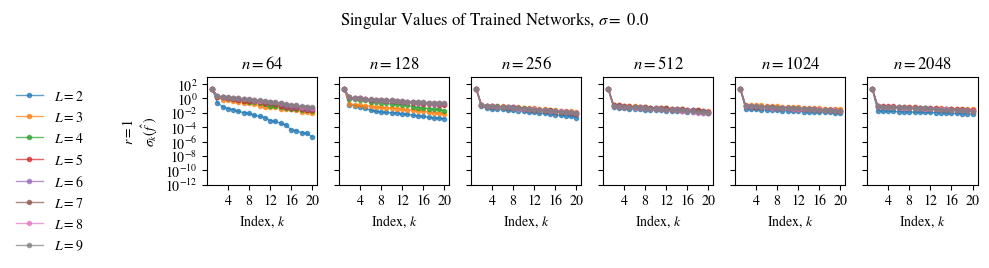

1,64,2 [2.0923061e+01 4.7731632e-01 3.2848510e-01 2.7345780e-01 2.3200536e-01
 1.0044925e-01 6.4735472e-02 4.6735682e-02 4.1192878e-02 2.8033528e-02
 1.8110849e-02 1.4201347e-02 1.2294606e-02 8.5400809e-03 7.8599714e-03
 5.6151007e-03 2.6779093e-03 2.1586444e-03 1.7372696e-03 1.1288333e-03] 0 0
1,64,3 [1.9741096e+01 1.7774576e+00 8.2748914e-01 5.8832902e-01 4.6055463e-01
 3.6200547e-01 2.8395528e-01 2.1912132e-01 1.6569646e-01 1.3234854e-01
 9.9468827e-02 8.3722711e-02 4.8430417e-02 4.4573776e-02 2.9559875e-02
 2.5964499e-02 1.8729229e-02 1.7776333e-02 1.2599550e-02 7.2266557e-03] 0 0
1,64,4 [1.9600801e+01 1.7677253e+00 1.5293299e+00 1.0702560e+00 8.1777799e-01
 4.9764892e-01 4.2433023e-01 3.7116775e-01 2.8185976e-01 1.9269314e-01
 1.7146198e-01 8.6319879e-02 8.2822666e-02 6.5584511e-02 4.2343676e-02
 3.1726874e-02 2.5781225e-02 2.1043608e-02 1.7226111e-02 1.4749674e-02] 0 0
1,64,5 [19.918936    1.6551199   1.4999313   1.1203295   0.98938495  0.5472024
  0.525083    0.43568835  0.41480

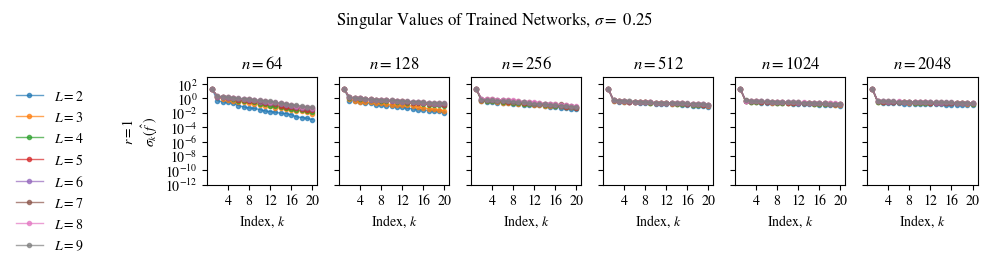

In [31]:
#all the singular values
for std in res.sigma.unique():
    f, ax = plt.subplots(nrows=len(res.r.unique()), ncols=len(res.n.unique()), sharex=True, sharey=True, figsize=(10,2.4))
    if len(res.r.unique()) == 1: ax = ax[np.newaxis]
    for rownum,row in res.iterrows():
        if row['sigma'] == std:
            whichrow = np.where(row['r'] == res.r.unique())[0][0]
            whichcol = np.where(row['n'] == res.n.unique())[0][0]
            print(rf"{row['r']},{row['n']},{row['L']}",row["Gradient Singular Values"]/np.sqrt(2048),whichrow,whichcol)
            ax[whichrow,whichcol].semilogy(row["Gradient Singular Values"]/np.sqrt(2048),label=rf"$L={row['L']}$",linewidth=1,alpha=0.7,marker=".")
            ax[whichrow,whichcol].set_xticks(list(range(3,20,4)),list(range(4,21,4)))
            ax[whichrow,whichcol].set_ylim(10**-9,10**3)
            ax[0,whichcol].set_title(rf"$n={row['n']}$")
            ax[-1,whichcol].set_xlabel(rf"Index, $k$")
    plt.subplot(len(res.r.unique()),len(res.n.unique()),1)
    leg = plt.legend()
    leg = plt.legend(bbox_to_anchor=(-1, 1))
    leg.get_frame().set_edgecolor('b')
    leg.get_frame().set_linewidth(0.0)
    for rnum,r in enumerate(res.r.unique()):
        plt.subplot(len(res.r.unique()),len(res.n.unique()),1+rnum*len(res.n.unique()))
        plt.ylabel(f"$r={r}$"+"\n"+r"$\sigma_k(\hat f)$")
        plt.yticks([10**p for p in range(-12,3,2)])
    plt.suptitle(rf"Singular Values of Trained Networks, $\sigma =$ {std}")
    plt.tight_layout()
    plt.savefig(job_name+f"_labelnoise{std}_sv.pdf",dpi=300)
    plt.show()

## Plots of L vs Validation error

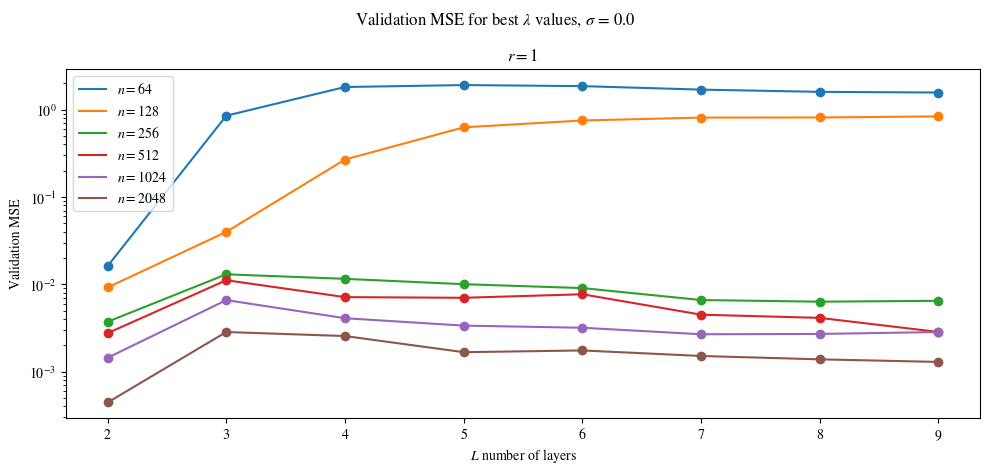

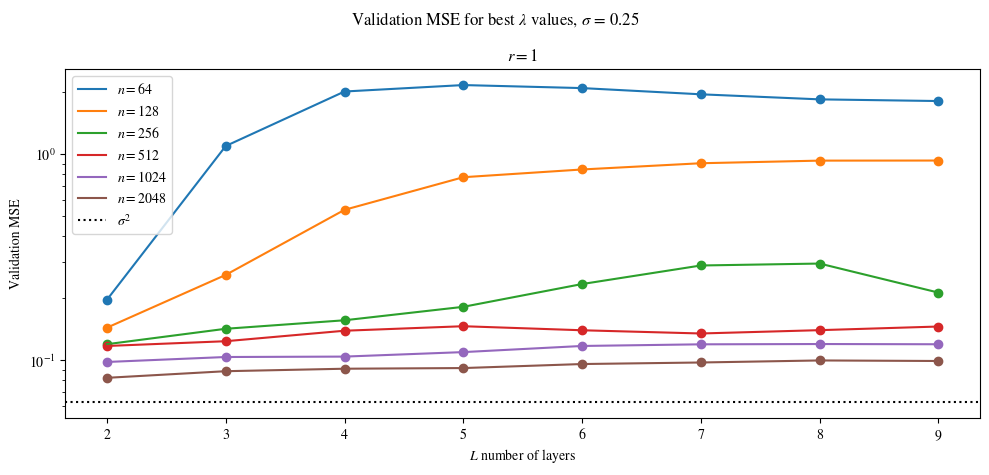

In [32]:
for std in res["sigma"].unique():
    f, ax = plt.subplots(ncols=len(res.r.unique()),nrows=1, sharex=True, sharey=False, figsize=(10,4.8))
    if len(res.r.unique()) == 1: ax = [ax]
    for rnum,r in enumerate(res.r.unique()):
        for n in res.n.unique():
                res_rnstd = res[(res.r == r) * (res.n == n) * (res["sigma"] == std)]
                ax[rnum].scatter(res_rnstd.L,res_rnstd[["Validation MSE"]])
                ax[rnum].semilogy(res_rnstd.L,res_rnstd[["Validation MSE"]],label=rf"$n={n}$")
                for _,model in res_rnstd.iterrows():
                    text = rf'$\lambda = {model["lambda"]:.0e}$' + f'\nfit {model["Final Train MSE"]:.1e}\nwd{model["Final Weight Decay"]:.1e}'
                    # ax[rnum].annotate(text,[model.L,model[["Validation MSE"]]],fontsize=1)
        ax[rnum].set_xlabel("$L$ number of layers")
        ax[rnum].set_title(rf"$r={r}$")
        if std > 0:
            ax[rnum].axhline(y=std**2, color='k', linestyle=':',label="$\sigma^2$")
        ax[0].set_ylabel("Validation MSE")
        f.suptitle(rf"Validation MSE for best $\lambda$ values, $\sigma$ = {std}")
    ax[0].legend()
    f.tight_layout()
    if int(std) == std:
        std = int(std)
    f.savefig(job_name+f"_labelnoise{std}_ValidationMSE.pdf",dpi=300)
    plt.show()

## Performance metrics with/without linear layers

In [33]:
columnwidth = 6.17406722223
markersize = 4
colors = {  
    0   :"C0",
    0.25:"C1",
    # 0.5 :"C2",
    # 1   :"C3"
}
labels = {
    "without extra layers":"-",
    "with extra layers"   :"--",
}
markers = {
    "without extra layers":".",
    "with extra layers"   :"x",
}

### generalization

(6, 32)
(6, 32)
(6, 32)
(6, 32)


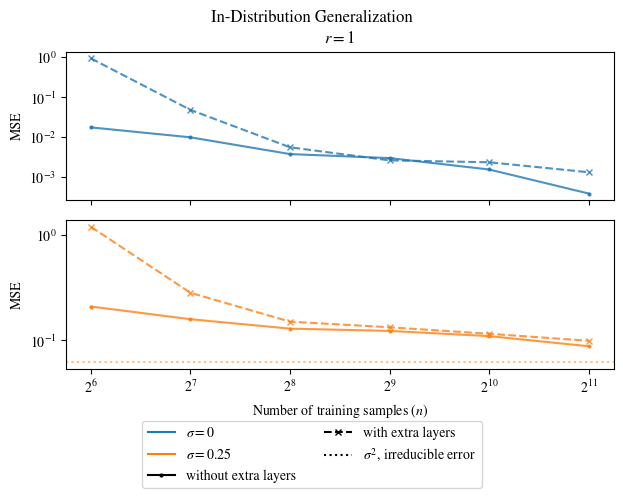

(6, 32)
(6, 32)
(6, 32)
(6, 32)


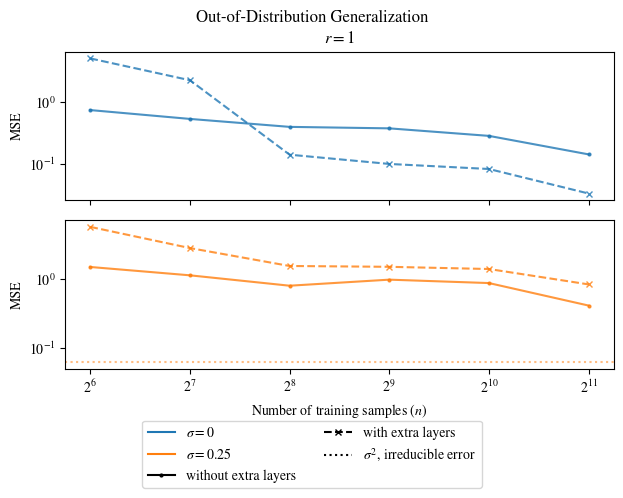

In [34]:
#generalization and OOD errors
handles = [
    Line2D([0], [0], color=color, ls='-', label=rf"$\sigma =${sigma}") for sigma,color in colors.items()
]
handles += [
    Line2D([0], [0], color='k', ls=ls, label=label, marker = markers[label], markersize=markersize) for label,ls in labels.items()
] 
handles += [
        Line2D([0], [0], color='k', ls=':', label='$\sigma^2$, irreducible error'),
]

for metric in ['In-Distribution','Out-of-Distribution']:
    standard_errors = metric[:-3] + 'SEM'
    f, ax = plt.subplots(ncols=len(res.r.unique()),nrows=2, sharex=True, sharey="row", figsize=(columnwidth,4.25))
    if len(res.r.unique()) == 1: ax = ax[:,np.newaxis]
    #just the data without label noise in the first row
    for col,r in enumerate(res.r.unique()):
        for row,sigmas in enumerate([[0],[0.25]]):#,0.5,1]]):
            for sigma in sigmas:
                for label,ls in labels.items():
                    if label == "with extra layers":#"with linear layers":
                        curr = bestLres[(bestLres.r == r) * (bestLres["sigma"]==sigma)]
                    elif label == "without extra layers":#"without linear layers":
                        curr = res[(res.L == 2) * (res.r == r) * (res["sigma"]==sigma)]
                    print(curr.shape)
                    points = curr[[metric + " MSE"]].values[:,0]
                    marker = markers[label]
                    ax[row,col].plot(curr.n,points,
                                        linestyle=ls,
                                        marker=marker,
                                        markersize=markersize,
                                        color=colors[sigma],
                                        alpha=0.8)
                    #horizontal dashed line for minimal possible MSE (ie sigma^2) in plots with label noise
                    ax[1,col].axhline(y=sigma**2, color=colors[sigma], linestyle=':',alpha=0.3)
            #plot set up
            ax[row,col].set_xscale("log",base=2)
            ax[row,col].set_xticks([2**k for k in range(6,12)])
            ax[row,col].set_yscale("log",base=10)
            ax[row,0].set_ylabel(f"MSE",wrap=True)
            ax[0,col].set_title(rf"$r={r}$") 
            ax[1,col].set_xlabel("Number of training samples ($n$)")
            ax[row,col].minorticks_off()
    f.legend(handles=handles, ncol=2, loc = 'upper center', bbox_to_anchor=(0.5,0.03))
    plt.suptitle(f"{metric} Generalization")
    plt.tight_layout(pad=0.5,h_pad=1.08, w_pad=1.08)
    plt.savefig(job_name+f"{metric} Generalization.pdf",dpi=300,bbox_inches='tight')
    plt.show()

### singular values

1 64 0 0
1 128 0 1
1 256 0 2
1 512 1 0
1 1024 1 1
1 2048 1 2


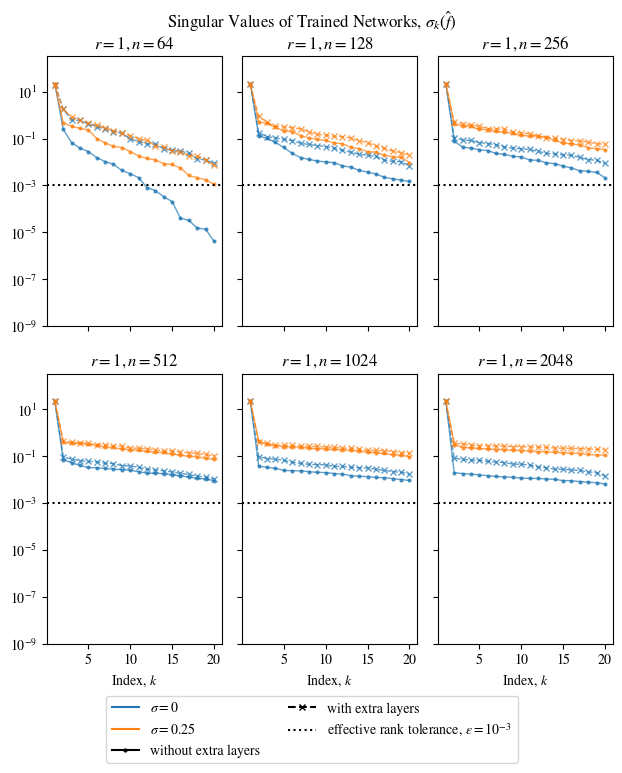

In [35]:
handles = [
    Line2D([0], [0], color=color, ls='-', label=rf"$\sigma =${sigma}") for sigma,color in colors.items()
]
handles += [
    Line2D([0], [0], color='k', ls=ls, label=label, marker = markers[label], markersize=markersize) for label,ls in labels.items()
] 
handles += [Line2D([0], [0], color='k', ls=':', label=r"effective rank tolerance, $\varepsilon = 10^{-3}$")]

ranktol = 1e-3
f, ax = plt.subplots(nrows=len(res.r.unique())*2, ncols=3, sharex=True, sharey=True, figsize=(columnwidth,7))#,5.75))
for rnum,r in enumerate(res.r.unique()):
    for nnum,n in enumerate(res.n.unique()):
        row = 2*rnum + nnum // 3
        col = nnum % 3
        print(r,n,row,col)
        for sigma in res.sigma.unique():
            for label,ls in labels.items():
                if label == "with extra layers":#"with linear layers":
                    curr = bestLres[(bestLres.r == r) * (bestLres.n == n) * (bestLres["sigma"] == sigma)]
                elif label == "without extra layers":#"without linear layers":
                    curr = res[(res.L == 2) * (res.n == n) * (res.r == r) * (res["sigma"]==sigma)]
                marker = markers[label]
                ax[row,col].semilogy(curr["Gradient Singular Values"].values[0]/np.sqrt(2048),
                    linestyle=ls,
                    linewidth=1,
                    alpha=0.7,
                    marker=marker,
                    markersize=markersize,
                    color=colors[sigma])
        ax[row,col].axhline(y=ranktol, color='k', linestyle=':',alpha=1, label = r"effective rank tolerance, $\varepsilon = 10^{-3}$")
        ax[row,col].set_xticks(list(range(4,20,5)),list(range(5,21,5)))
        ax[0,0].set_yticks([10**p for p in range(-9,3,2)])
        ax[row,col].set_title(rf"$r={r},n={n}$")
        ax[-1,col].set_xlabel(rf"Index, $k$")
        ax[row,col].set_ylim(10**(-9),10**(2.5))
f.legend(handles=handles, ncol=2, loc = 'upper center', bbox_to_anchor=(0.5,0.01))
plt.suptitle(r"Singular Values of Trained Networks, $\sigma_k(\hat{f})$")
plt.tight_layout(pad=0.5,h_pad=1.08, w_pad=1.08)
plt.savefig(job_name+f"_labelnoise_sv.pdf",dpi=300, bbox_inches='tight')
plt.show()
handles.pop()

### active subspaces

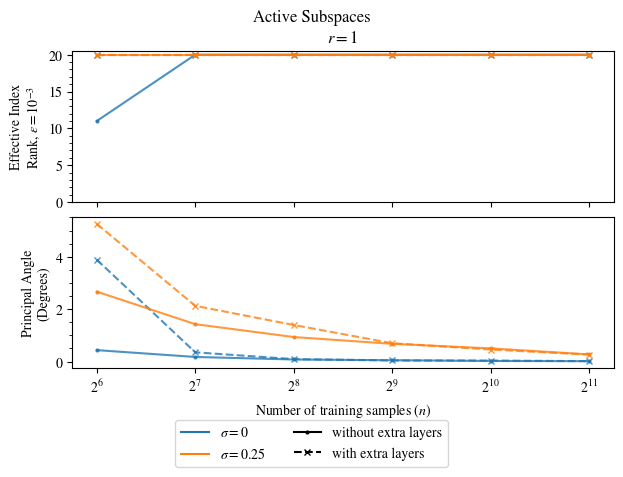

In [36]:
handles = [
    Line2D([0], [0], color=color, ls='-', label=rf"$\sigma =${sigma}") for sigma,color in colors.items()
]
handles += [
    Line2D([0], [0], color='k', ls=ls, label=label, marker = markers[label], markersize=markersize) for label,ls in labels.items()
] 

#active subspace error plot
f, ax = plt.subplots(ncols=len(res.r.unique()),nrows=2, sharex=True, sharey=False, figsize=(columnwidth,4.25))
if len(res.r.unique()) == 1: ax = ax[:,np.newaxis]
for row,metric in enumerate([r"Effective Index Rank, $\varepsilon = 10^{-3}$","Principal Angle (Degrees)"]):
    for col,r in enumerate(res.r.unique()):
        for sigma in [0,0.25]:#,0.5,1]:
            for label,ls in labels.items():
                if label == "with extra layers":#"with linear layers":
                    curr = bestLres[(bestLres.r == r) * (bestLres["sigma"] == sigma)]
                elif label == "without extra layers":#"without linear layers":
                    curr = res[(res.L == 2) * (res.r == r) * (res["sigma"]==sigma)]
                if metric == "Principal Angle (Degrees)":
                    points = curr[[metric]].values[:,0]
                elif metric == r"Effective Index Rank, $\varepsilon = 10^{-3}$":
                    points = (np.array(curr["Gradient Singular Values"].tolist())/np.sqrt(2048) > ranktol).sum(axis=1)
                    ax[row,col].set_yticks(np.arange(0,21,5))
                    ax[row,col].set_ylim(0,20.5)
                marker = markers[label]
                ax[row,col].plot(curr.n,points,
                                    linestyle=ls,
                                    color=colors[sigma],
                                    marker=marker,
                                    markersize=markersize,
                                    alpha=0.8)
                # for (_,model),y in zip(curr.iterrows(),points):
                #     text = rf'$\lambda = {model["lambda"]:.0e}$' + f'\nL = {model["L"]}\nfit {model["Final Train MSE"]:.1e}\nwd{model["Final Weight Decay"]:.1e}\nVal{model["Validation MSE"]:.1e}'
                #     ax[row,col].annotate(text,[model["n"],y],fontsize=1)
        #plot set up
        ax[row,0].set_ylabel(metric[:15] + '\n' + metric[16:])
        ax[0,col].set_title(rf"$r={r}$") 
        ax[0,col].set_yticks(range(21), minor=True)
        ax[row,col].set_xscale("log",base=2)
        ax[row,col].set_xticks([2**k for k in range(6,12)])
        ax[1,col].set_xlabel("Number of training samples ($n$)")
        ax[row,col].minorticks_on()
f.legend(handles=handles, ncol=2, loc = 'upper center', bbox_to_anchor=(0.5,0.03))
plt.suptitle(f"Active Subspaces")
plt.tight_layout(pad=0.5,h_pad=0.5, w_pad=0.5)
plt.savefig(job_name+f"Active Subspaces.pdf",dpi=300,bbox_inches='tight')
plt.show()